# 2. Correlaciones, tratamiento de missing y outliers:

### Importo librerías:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
#import warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

### Funciones:

In [2]:
import funciones_auxiliares as f_aux

### Lectura de datos del preprocesado inicial:

In [3]:
df_fraud = pd.read_csv("../data/df_data_initial_preprocessing.csv").drop("Unnamed: 0", axis = 1)

df_fraud.shape

(1000000, 32)

In [4]:
df_fraud

intended_balcon_amount  prev_address_months_count  bank_months_count  \
0                          NaN                        NaN               24.0   
1                          NaN                        NaN               15.0   
2                          NaN                        NaN                NaN   
3                          NaN                        NaN               31.0   
4                          NaN                        NaN               31.0   
...                        ...                        ...                ...   
999995                     NaN                        NaN               25.0   
999996                     NaN                      148.0                NaN   
999997               34.692760                        NaN               11.0   
999998               94.661055                        NaN               28.0   
999999                9.908499                        NaN               15.0   

        current_address_months_count  session_length_in_minutes  \
0                               88.0                   3.888115   
1                              144.0                  31.798819   
2                              132.0                   4.728705   
3                               22.0                   2.047904   
4                              218.0                   3.775225   
...                              ...                        ...   
999995                         104.0                   8.511502   
999996                           9.0                   8.967865   
999997                          30.0                   8.195531   
999998                         189.0                   4.336064   
999999                         321.0                   6.717022   

        device_distinct_emails_8w  fraud_bool  foreign_request  \
0                             1.0           1              0.0   
1                             1.0           1              0.0   
2                             1.0           1              0.0   
3                             1.0           1              0.0   
4                             1.0           1              0.0   
...                           ...         ...              ...   
999995                        1.0           0              0.0   
999996                        1.0           0              0.0   
999997                        1.0           0              0.0   
999998                        1.0           0              0.0   
999999                        1.0           0              0.0   

        phone_mobile_valid  has_other_cards  proposed_credit_limit  device_os  \
0                      0.0              0.0                  500.0    windows   
1                      0.0              0.0                 1500.0    windows   
2                      1.0              0.0                  200.0      other   
3                      1.0              1.0                  200.0      linux   
4                      0.0              0.0                 1500.0  macintosh   
...                    ...              ...                    ...        ...   
999995                 1.0              0.0                  200.0      linux   
999996                 1.0              0.0                  200.0    windows   
999997                 1.0              0.0                  200.0      other   
999998                 0.0              0.0                  500.0    windows   
999999                 1.0              0.0                  200.0      linux   

          source housing_status  keep_alive_session  device_fraud_count  \
0       INTERNET             BA                 0.0                 0.0   
1       INTERNET             BA                 0.0                 0.0   
2       INTERNET             BA                 0.0                 0.0   
3       INTERNET             BA                 0.0                 0.0   
4       INTERNET             BA                 1.0                 0.0   
...          ...          

In [5]:
df_fraud.head()

intended_balcon_amount  prev_address_months_count  bank_months_count  \
0                     NaN                        NaN               24.0   
1                     NaN                        NaN               15.0   
2                     NaN                        NaN                NaN   
3                     NaN                        NaN               31.0   
4                     NaN                        NaN               31.0   

   current_address_months_count  session_length_in_minutes  \
0                          88.0                   3.888115   
1                         144.0                  31.798819   
2                         132.0                   4.728705   
3                          22.0                   2.047904   
4                         218.0                   3.775225   

   device_distinct_emails_8w  fraud_bool  foreign_request  phone_mobile_valid  \
0                        1.0           1              0.0                 0.0   
1                        1.0           1              0.0                 0.0   
2                        1.0           1              0.0                 1.0   
3                        1.0           1              0.0                 1.0   
4                        1.0           1              0.0                 0.0   

   has_other_cards  proposed_credit_limit  device_os    source housing_status  \
0              0.0                  500.0    windows  INTERNET             BA   
1              0.0                 1500.0    windows  INTERNET             BA   
2              0.0                  200.0      other  INTERNET             BA   
3              1.0                  200.0      linux  INTERNET             BA   
4              0.0                 1500.0  macintosh  INTERNET             BA   

   keep_alive_session  device_fraud_count  phone_home_valid  \
0                 0.0                 0.0               1.0   
1                 0.0                 0.0               0.0   
2                 0.0                 0.0               0.0   
3                 0.0                 0.0               0.0   
4                 1.0                 0.0               1.0   

   credit_risk_score  email_is_free  income employment_status  \
0              185.0            0.0     0.9                CA   
1              259.0            1.0     0.9                CA   
2              177.0            1.0     0.9                CB   
3              110.0            1.0     0.9                CA   
4              295.0            1.0     0.9                CA   

   date_of_birth_distinct_emails_4w  bank_branch_count_8w  velocity_4w  \
0                               6.0                   1.0  3863.647740   
1                               3.0                 718.0  3124.298166   
2                              14.0                   1.0  3159.590679   
3                               6.0                1921.0  3022.261812   
4                               2.0                1990.0  3087.670952   

   velocity_24h   velocity_6h  zip_count_4w payment_type  days_since_request  \
0   3134.319630  10650.765523         769.0           AA            0.020925   
1   2670.918292    534.047319         366.0           AB            0.005418   
2   2893.621498   4048.534263         870.0           AC            3.108549   
3   4054.908412   3457.064063         810.0           AB            0.019079   
4   2728.237159   5020.341679         890.0           AB            0.004441   

   customer_age  name_email_similarity  month  
0          50.0               0.166828    7.0  
1          50.0               0.296286    7.0  
2          40.0               0.044985    7.0  
3          50.0               0.159511    7.0  
4          50.0               0.596414    7.0

In [6]:
df_fraud.columns

Index(['intended_balcon_amount', 'prev_address_months_count',
       'bank_months_count', 'current_address_months_count',
       'session_length_in_minutes', 'device_distinct_emails_8w', 'fraud_bool',
       'foreign_request', 'phone_mobile_valid', 'has_other_cards',
       'proposed_credit_limit', 'device_os', 'source', 'housing_status',
       'keep_alive_session', 'device_fraud_count', 'phone_home_valid',
       'credit_risk_score', 'email_is_free', 'income', 'employment_status',
       'date_of_birth_distinct_emails_4w', 'bank_branch_count_8w',
       'velocity_4w', 'velocity_24h', 'velocity_6h', 'zip_count_4w',
       'payment_type', 'days_since_request', 'customer_age',
       'name_email_similarity', 'month'],
      dtype='object')

In [7]:
categoricals_list, other = f_aux.dame_variables_categoricas(dataset = df_fraud)
df_fraud[categoricals_list] = df_fraud[categoricals_list].astype("category")
continuous_list = list(df_fraud.select_dtypes("float").columns)
df_fraud[continuous_list] = df_fraud[continuous_list].astype(float)
df_fraud.dtypes #aquí estamos comprobando en todas las columnas de qué tipo son

intended_balcon_amount               float64
prev_address_months_count            float64
bank_months_count                    float64
current_address_months_count         float64
session_length_in_minutes            float64
device_distinct_emails_8w            float64
fraud_bool                          category
foreign_request                      float64
phone_mobile_valid                   float64
has_other_cards                      float64
proposed_credit_limit                float64
device_os                           category
source                              category
housing_status                      category
keep_alive_session                   float64
device_fraud_count                   float64
phone_home_valid                     float64
credit_risk_score                    float64
email_is_free                        float64
income                               float64
employment_status                   category
date_of_birth_distinct_emails_4w     float64
bank_branc

### Separación en train y test estratificado:

In [8]:
# Calculate percentages and reset index for the first DataFrame
df_fraud_bool = df_fraud["fraud_bool"]\
    .value_counts(normalize = True)\
    .mul(100).rename("percent").reset_index()

# Calculate counts and reset index for the second DataFrame
df_fraud_bool_conteo = df_fraud["fraud_bool"].value_counts().reset_index()

# Merge the two DataFrames on the "fraud_bool" column
df_fraud_bool_pc = pd.merge(df_fraud_bool, df_fraud_bool_conteo, on = "fraud_bool", how = 'inner')\
        .rename(columns = {"fraud_bool": "index"})
df_fraud_bool_pc


fig = px.histogram(df_fraud_bool_pc, x = "index", y = ['percent'])
fig.update_xaxes(tickvals = [0, 1])
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
x_df_fraud, x_df_fraud_test, y_df_fraud, y_df_fraud_test = train_test_split(
                                                                    df_fraud.drop("fraud_bool",axis=1), 
                                                                    df_fraud["fraud_bool"], 
                                                                    stratify = df_fraud["fraud_bool"], 
                                                                    test_size = 0.2)
df_fraud_train = pd.concat([x_df_fraud, y_df_fraud], axis = 1)
df_fraud_test = pd.concat([x_df_fraud_test, y_df_fraud_test], axis = 1)
df_fraud_test

intended_balcon_amount  prev_address_months_count  bank_months_count  \
164893                     NaN                        NaN                NaN   
259912                     NaN                        NaN               19.0   
158133               26.750203                        NaN               31.0   
974829                     NaN                       41.0                1.0   
900372                     NaN                        NaN                1.0   
...                        ...                        ...                ...   
798488                     NaN                        NaN               25.0   
216923                     NaN                        NaN               15.0   
38651                      NaN                       28.0               28.0   
855203               52.649272                        NaN                1.0   
677134                     NaN                       11.0               26.0   

        current_address_months_count  session_length_in_minutes  \
164893                          34.0                   6.284015   
259912                         197.0                   3.463159   
158133                         184.0                   3.512410   
974829                           NaN                   2.965838   
900372                          11.0                   4.969989   
...                              ...                        ...   
798488                          30.0                   2.140956   
216923                         119.0                   1.372113   
38651                            6.0                   7.358852   
855203                         178.0                   6.331757   
677134                           8.0                   3.204506   

        device_distinct_emails_8w  foreign_request  phone_mobile_valid  \
164893                        1.0              0.0                 1.0   
259912                        1.0              0.0                 1.0   
158133                        1.0              0.0                 1.0   
974829                        1.0              0.0                 1.0   
900372                        1.0              0.0                 0.0   
...                           ...              ...                 ...   
798488                        1.0              0.0                 1.0   
216923                        1.0              0.0                 1.0   
38651                         1.0              0.0                 0.0   
855203                        1.0              0.0                 1.0   
677134                        2.0              0.0                 1.0   

        has_other_cards  proposed_credit_limit  device_os    source  \
164893              0.0                  500.0      other  INTERNET   
259912              0.0                  200.0  macintosh  INTERNET   
158133              1.0                 1500.0      other  INTERNET   
974829              0.0                  200.0      other  INTERNET   
900372              1.0                  200.0      linux  INTERNET   
...                 ...                    ...        ...       ...   
798488              0.0                  200.0      linux  INTERNET   
216923              0.0                  200.0      other  INTERNET   
38651               0.0                  990.0    windows  INTERNET   
855203              1.0                 1500.0      other  INTERNET   
677134              0.0                  200.0      linux  INTERNET   

       housing_status  keep_alive_session  device_fraud_count  \
164893             BA                 0.0                 0.0   
259912             BB                 1.0                 0.0   
158133             BA                 0.0                 0.0   
974829             BC                 1.0                 0.0   
900372             BC                 0.0                 0.0   
...               ...                 ...                 ...   
798488             BB                 0.0    

In [10]:
print("", '== Train\n', df_fraud_train["fraud_bool"].value_counts(normalize = True))
print("""
""", '== Test\n', df_fraud_test["fraud_bool"].value_counts(normalize = True))

 == Train
 fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64

 == Test
 fraud_bool
0    0.98897
1    0.01103
Name: proportion, dtype: float64


### Visualización descriptiva de los datos:

In [11]:
fraud_series_null_columns = df_fraud_train.isnull().sum().sort_values(ascending = False)
fraud_series_null_rows = df_fraud_train.isnull().sum(axis = 1).sort_values(ascending = False)

df_null_columns = pd.DataFrame(fraud_series_null_columns, columns = ["null_columns"])
df_null_rows = pd.DataFrame(fraud_series_null_rows, columns = ["null_rows"])

df_null_rows["target"] = df_fraud["fraud_bool"]
df_null_columns["column_percentage"] = df_null_columns["null_columns"] / df_fraud.shape[0]
df_null_rows["row_percentage"] = df_null_rows["null_rows"] / df_fraud.shape[1]

df_null_columns.head(6)

null_columns  column_percentage
intended_balcon_amount              593888           0.593888
prev_address_months_count           570093           0.570093
bank_months_count                   202769           0.202769
current_address_months_count          3427           0.003427
session_length_in_minutes             1582           0.001582
device_distinct_emails_8w              289           0.000289

intended_balcon_amount: Cerca del 59.45% de los valores en esta columna son nulos. 

prev_address_months_count: Alrededor del 57.04% de los valores en esta columna son nulos.

bank_months_count: Aproximadamente el 20.33% de los valores en esta columna son nulos.

current_address_months_count: Un 0.34% de los valores en esta columna son nulos.

session_length_in_minutes: Un 0.16% de los valores en esta columna son nulos.

device_distinct_emails_8w: Solo alrededor del 0.03% de los valores en esta columna son nulos.

In [12]:
len(df_fraud_train.columns)

32

In [13]:
len(df_fraud_train.columns[:16])

16

In [14]:
len(df_fraud_train.columns[16:])

16

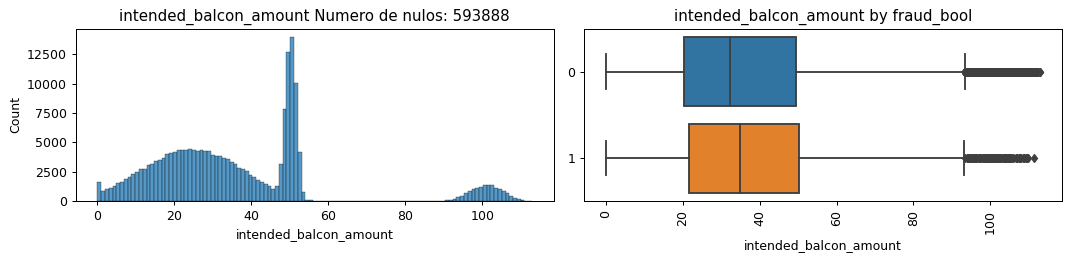

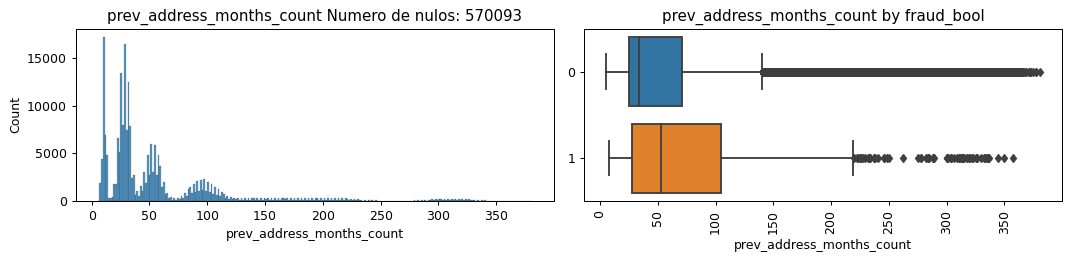

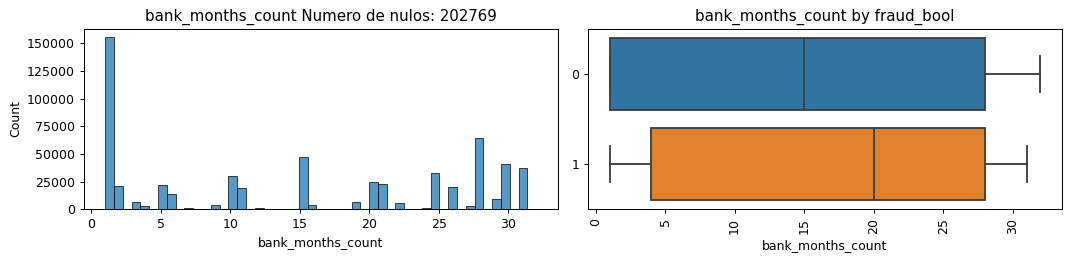

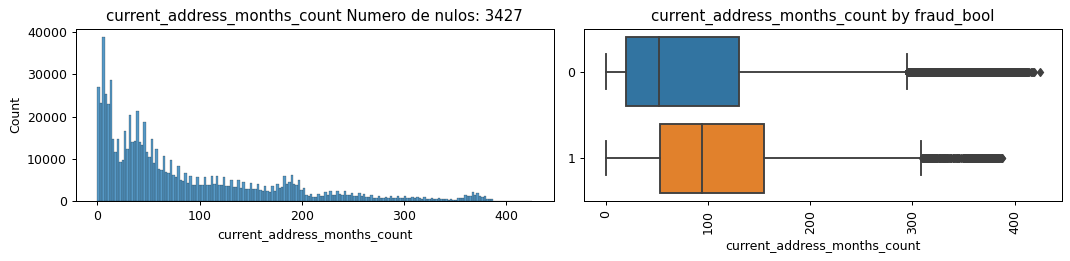

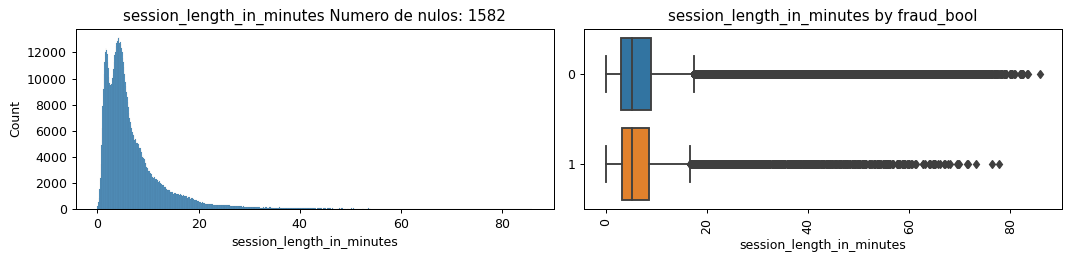

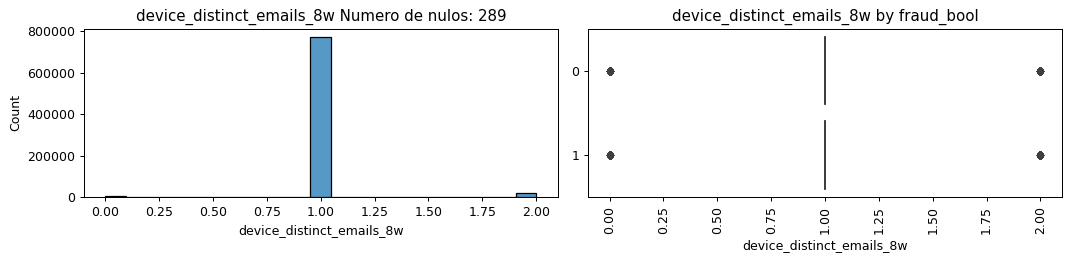

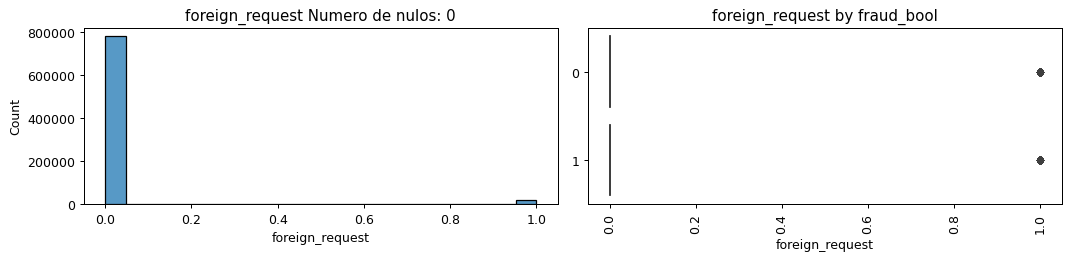

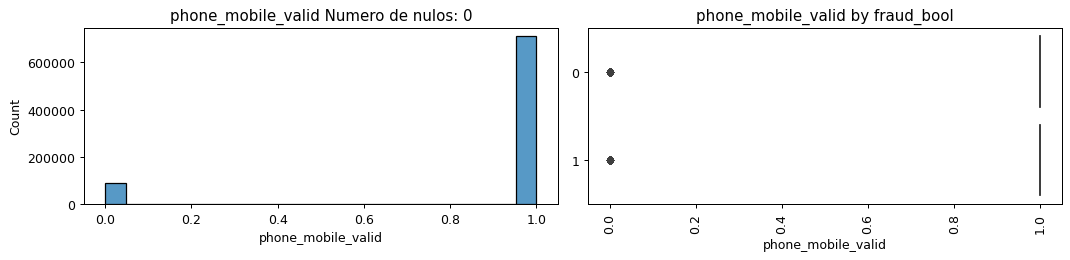

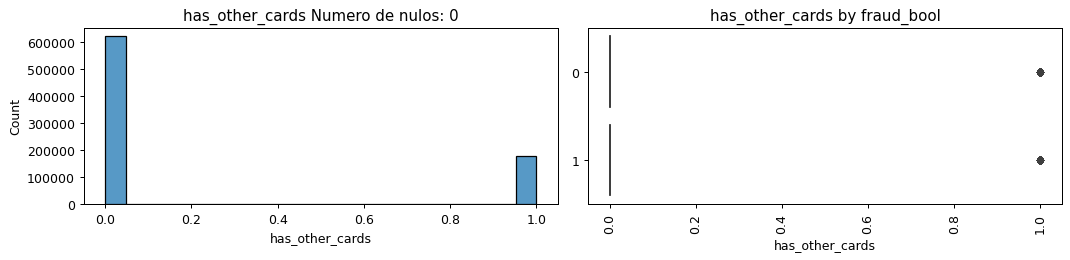

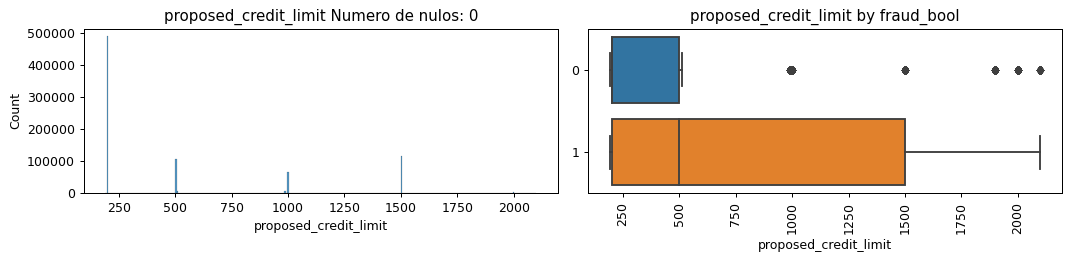

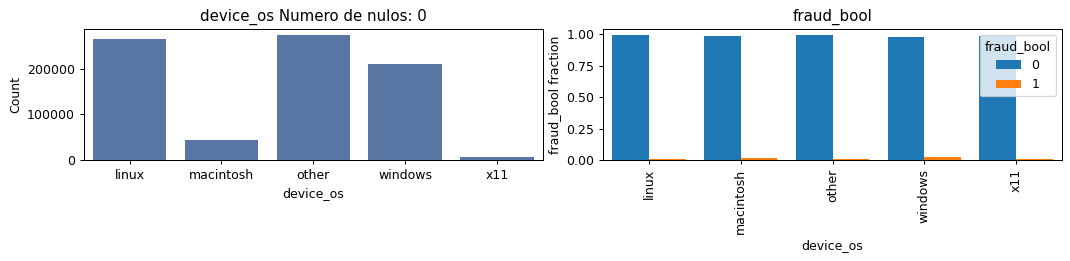

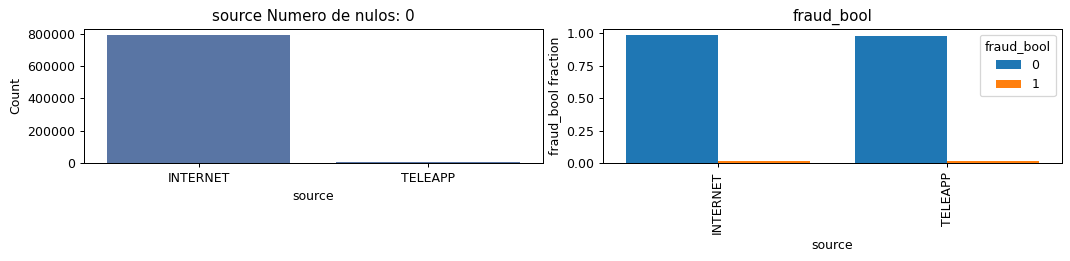

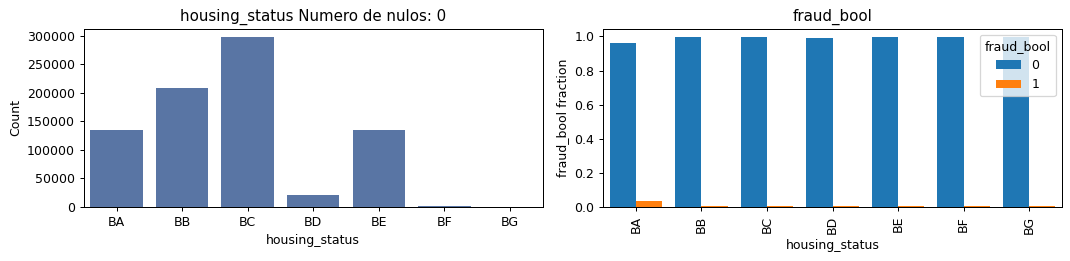

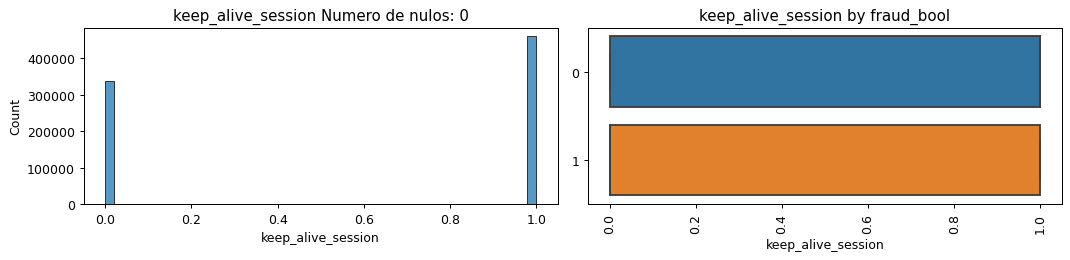

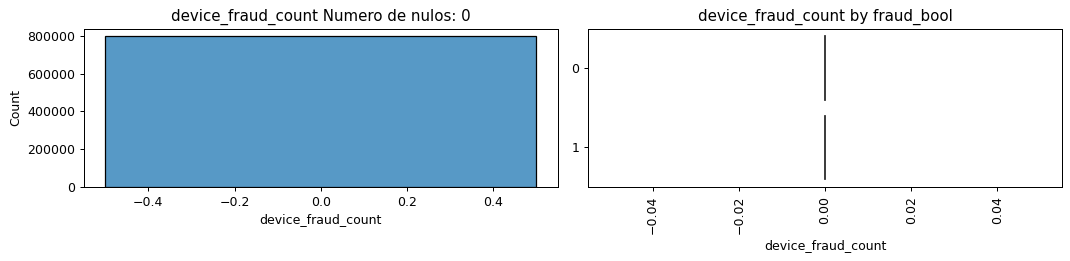

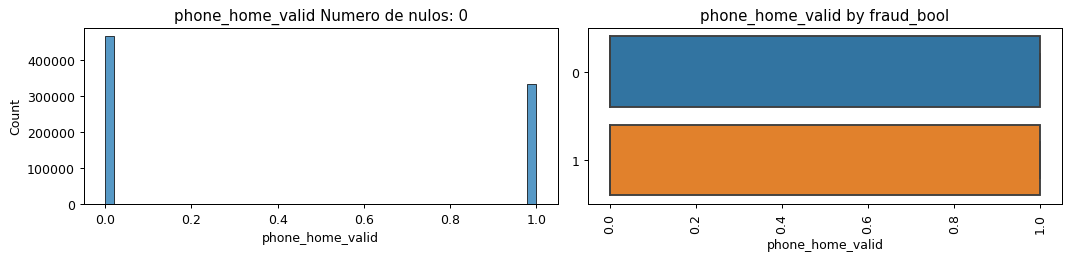

In [15]:
for i in list(df_fraud_train.columns[:16]):
    if (df_fraud_train[i].dtype == float) & (i != "fraud_bool"):
        f_aux.plot_feature(df_fraud_train, col_name = i, isContinuous = True, target = "fraud_bool")
    elif  i != "fraud_bool":
        f_aux.plot_feature(df_fraud_train, col_name = i, isContinuous = False, target = "fraud_bool")

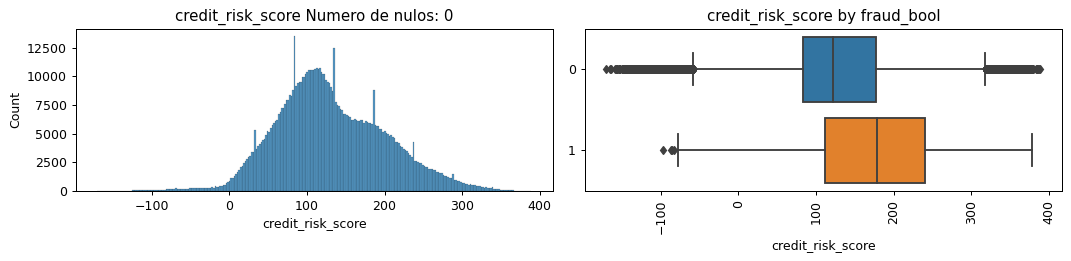

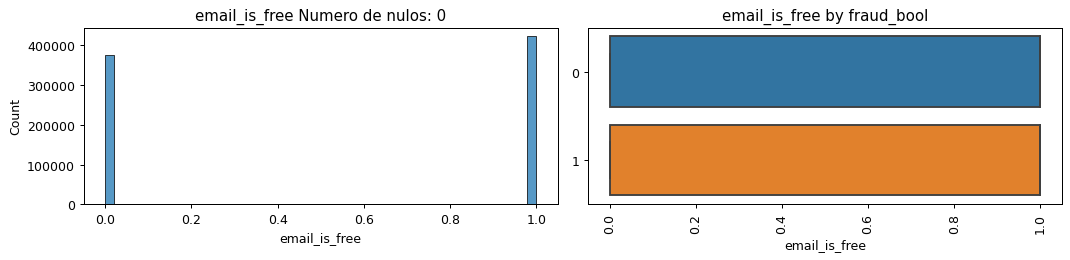

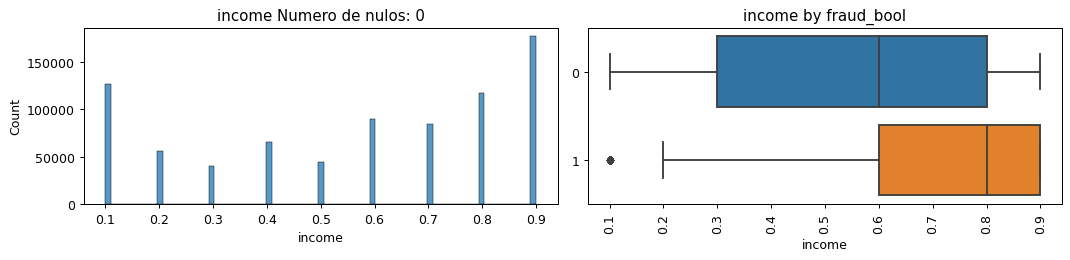

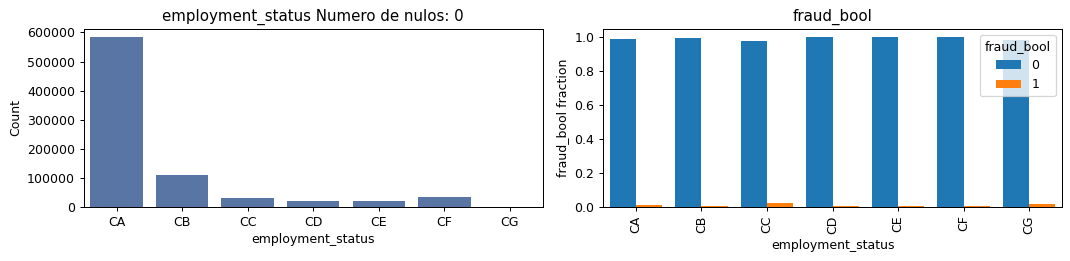

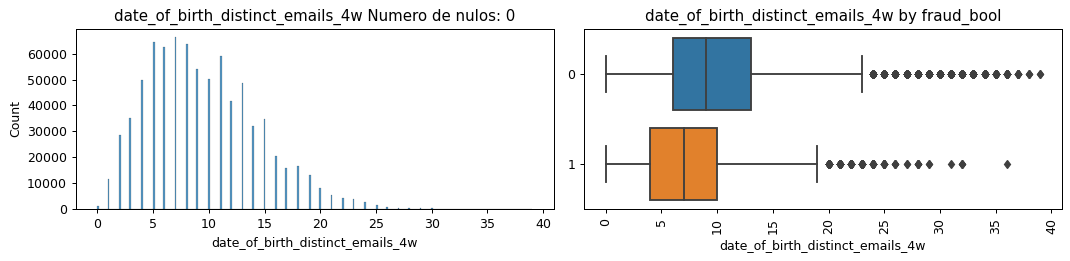

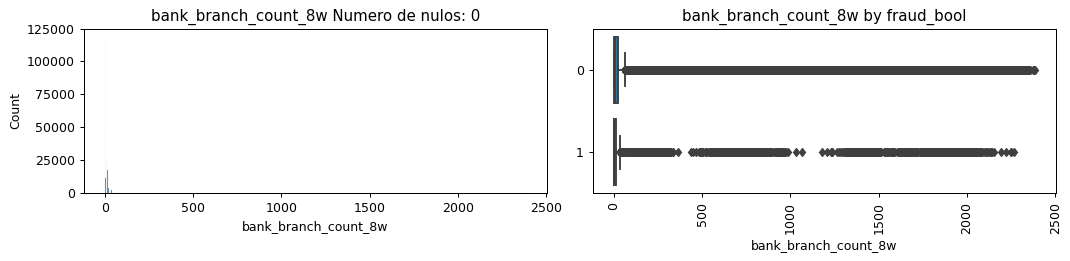

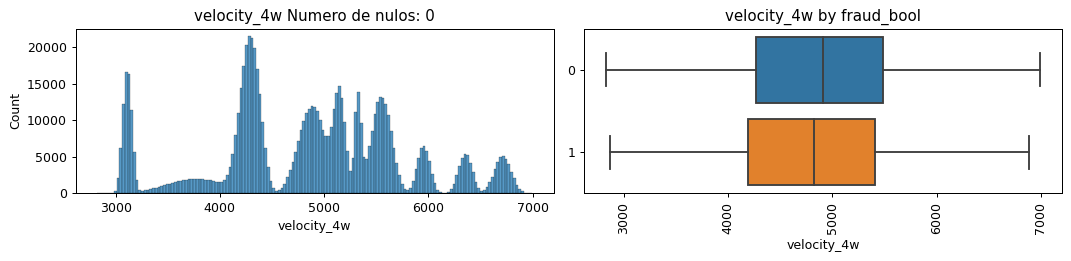

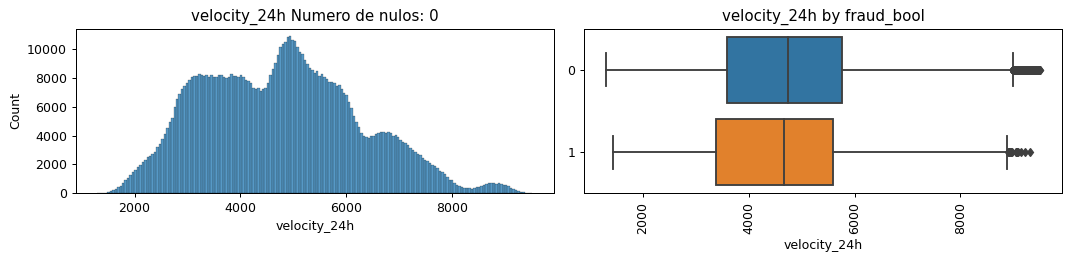

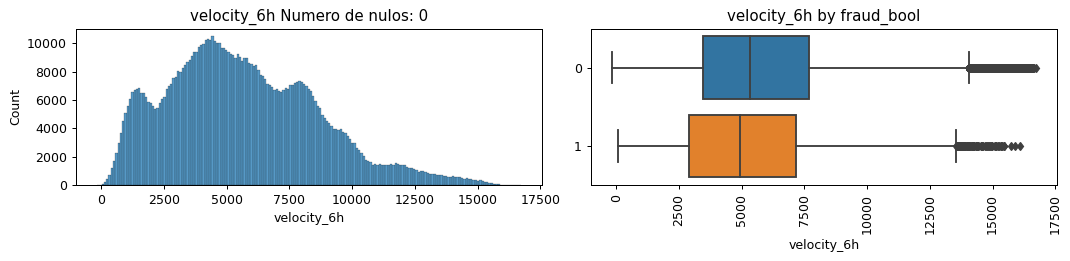

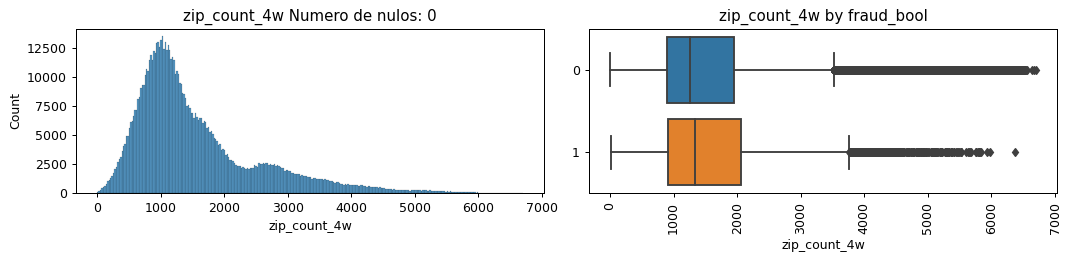

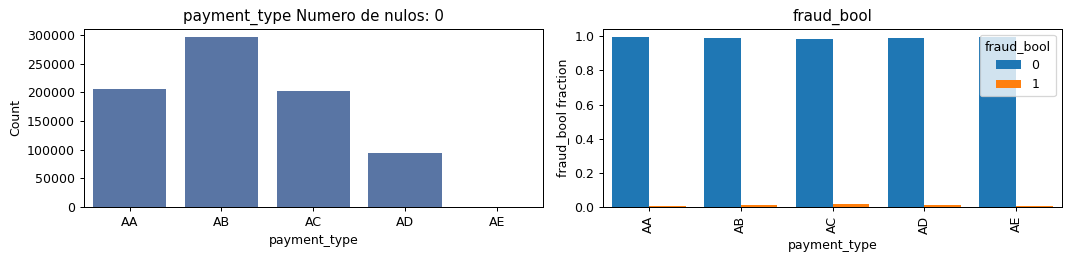

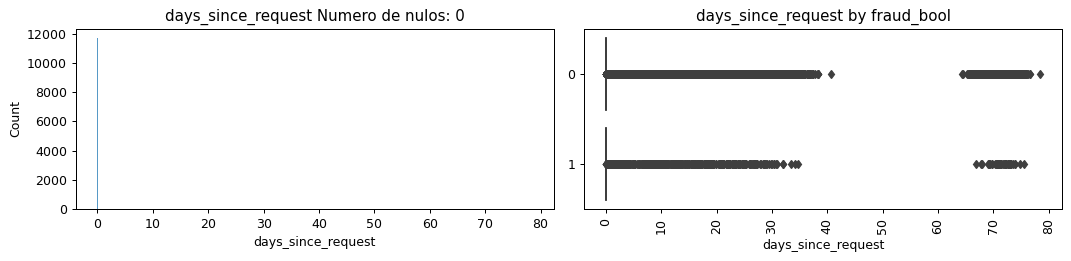

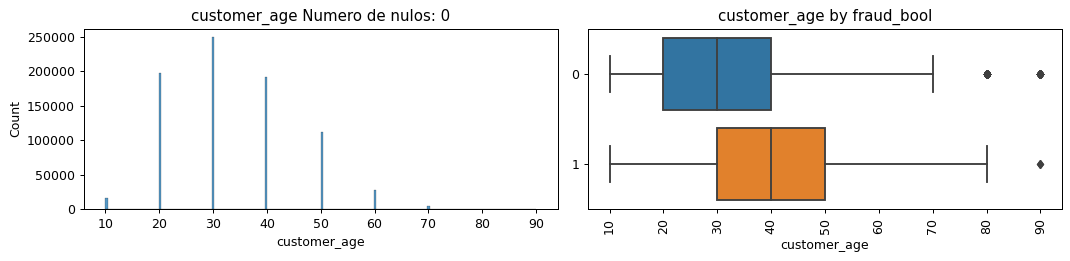

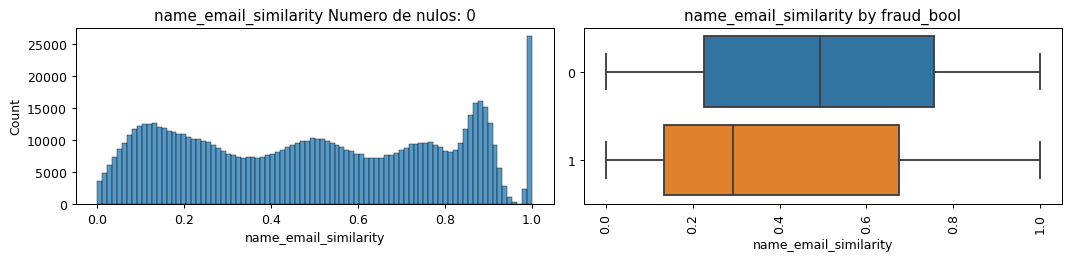

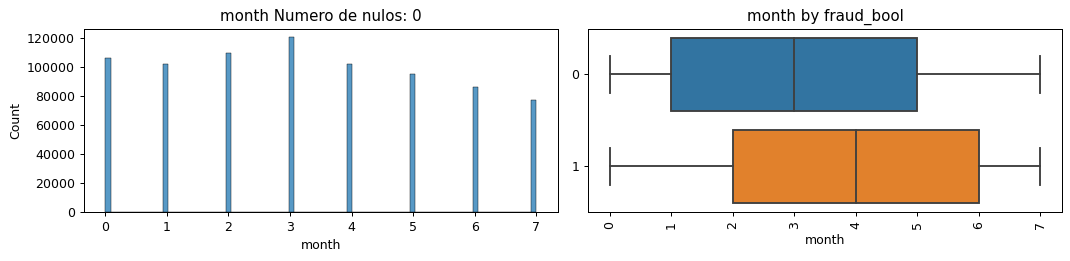

In [16]:
for i in list(df_fraud_train.columns[16:]):
    if (df_fraud_train[i].dtype == float) & (i != "fraud_bool"):
        f_aux.plot_feature(df_fraud_train, col_name = i, isContinuous = True, target = "fraud_bool")
    elif  i != "fraud_bool":
        f_aux.plot_feature(df_fraud_train, col_name = i, isContinuous = False, target = "fraud_bool")

### Tratamiento de las variables continuas:

In [17]:
continuous_list

['intended_balcon_amount',
 'prev_address_months_count',
 'bank_months_count',
 'current_address_months_count',
 'session_length_in_minutes',
 'device_distinct_emails_8w',
 'foreign_request',
 'phone_mobile_valid',
 'has_other_cards',
 'proposed_credit_limit',
 'keep_alive_session',
 'device_fraud_count',
 'phone_home_valid',
 'credit_risk_score',
 'email_is_free',
 'income',
 'date_of_birth_distinct_emails_4w',
 'bank_branch_count_8w',
 'velocity_4w',
 'velocity_24h',
 'velocity_6h',
 'zip_count_4w',
 'days_since_request',
 'customer_age',
 'name_email_similarity',
 'month']

### Tratamiento de outliers:

In [18]:
f_aux.get_deviation_of_mean_perc(df_fraud_train, continuous_list, target = "fraud_bool", multiplier = 3)

no_fraud     fraud                          variable  sum_outlier_values  \
0   0.989024  0.010976            intended_balcon_amount                1640   
1   0.993193  0.006807         prev_address_months_count                6905   
2   0.984446  0.015554      current_address_months_count               16845   
3   0.980334  0.019666         session_length_in_minutes               18814   
4   0.961992  0.038008         device_distinct_emails_8w               25179   
5   0.977977  0.022023                   foreign_request               20206   
6   0.867963  0.132037             proposed_credit_limit                4938   
7   0.967928  0.032072                 credit_risk_score                2775   
8   0.994164  0.005836  date_of_birth_distinct_emails_4w                4969   
9   0.989432  0.010568              bank_branch_count_8w               32741   
10  0.995327  0.004673                      velocity_24h                 428   
11  0.992505  0.007495                       velocity_6h                3469   
12  0.990815  0.009185                      zip_count_4w               12956   
13  0.987651  0.012349                days_since_request               14171   
14  0.957541  0.042459                      customer_age                6312   

    porcentaje_sum_outlier_values  
0                        0.002050  
1                        0.008631  
2                        0.021056  
3                        0.023518  
4                        0.031474  
5                        0.025257  
6                        0.006173  
7                        0.003469  
8                        0.006211  
9                        0.040926  
10                       0.000535  
11                       0.004336  
12                       0.016195  
13                       0.017714  
14                       0.007890

En la tabla de arriba podemos ver todos los outliers de todas las columnas contínuas del conjunto de datos. El dataset en su totalidad tiene un porcentaje de fraude de solo 2% y 98% de no tener fraude. Teniendo esto en cuenta, tiene sentido que la mayoria de los outliers tengan un porcentaje de fraude y no fraude parecido al de 2% y 98% respectivamente, pero podemos ver que esto no es lo que se observa en la variable de "proposed_credit_limit" donde cuentas bancarias que han cometido fraude son el 13% de los outliers, por lo que habría que revisar los outliers de esta variable más detenidamente ya que se excede de lo normal.

Además, las siguientes variables son las que tienen un porcentaje de outliers más altos en el conjunto de datos:

bank_branch_count_8w: Cerca del 4.1% de los valores son considerados atípicos.

current_address_months_count: Alrededor del 2.14% de los valores son considerados atípicos.

session_length_in_minutes: Aproximadamente el 2.35% de los valores son considerados atípicos.

device_distinct_emails_8w: Un 3.16% de los valores son considerados atípicos.

proposed_credit_limit: Cerca del 0.61% de los valores son considerados atípicos.

credit_risk_score: Alrededor del 0.35% de los valores son considerados atípicos. Lo mismo con los demás.

Se puede observar que, en las variables de "device_distinct_emails_8w", "credit_risk_score", y especialmente "customer_age", los outlier tienen un porcentaje mucho más alto de haber cometido fraude (36.9%, 33.6%, y 40.1%) comparado con los outliers del resto de las variables contínuas.

## Correlaciones:

A continuación, correlaciones entre las diferentes variables:

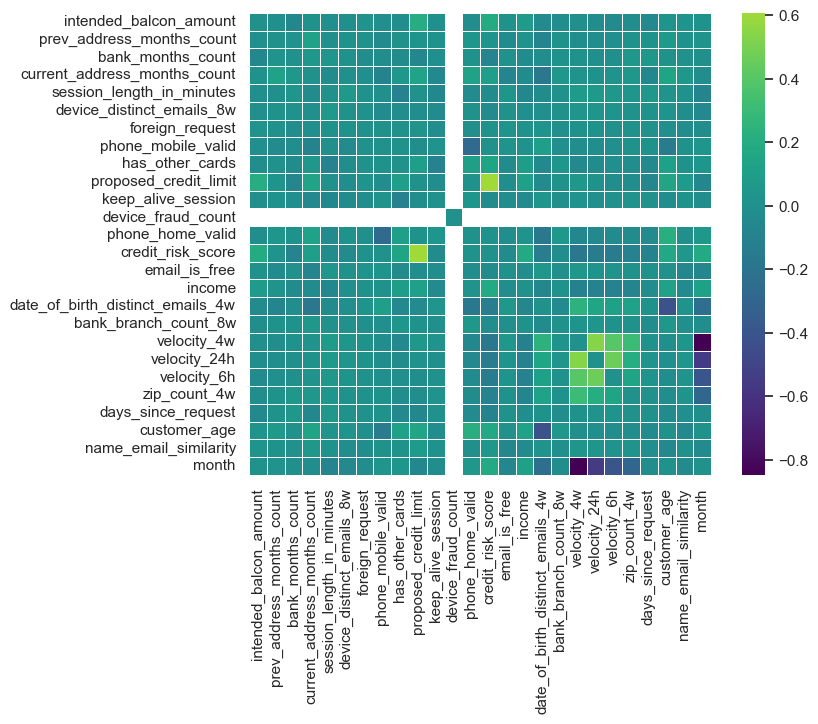

0

In [19]:
# Correlaciones entre las diferentes variables
f_aux.get_corr_matrix(dataset = df_fraud_train[continuous_list], metodo = 'pearson', size_figure = [8,6])

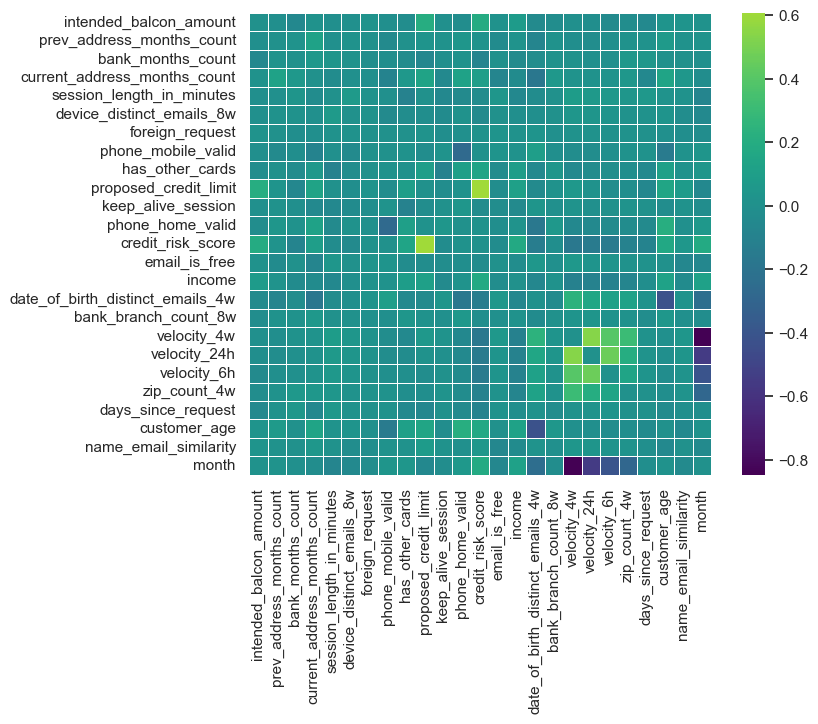

0

In [20]:
continuous_list.remove('device_fraud_count')

f_aux.get_corr_matrix(dataset = df_fraud_train[continuous_list], metodo = 'pearson', size_figure = [8,6])

level_0: Variable en el primer nivel de la correlación.

level_1: Variable en el segundo nivel de la correlación.

Correlation: Valor de correlación entre las dos variables indicadas en level_0 y level_1.

Las correlaciones indican cómo dos variables están relacionadas entre sí. Aquí hay algunas observaciones sobre las correlaciones presentadas:

Comprobando que variables tienen una correlacón entre sí más alta del 0.4%:

Las variables de month y velocity_4w tienen una fuerte correlación positive de 0.85. Además, existe una correlación positiva moderada (0.61) entre credit_risk_score y proposed_credit_limit.

In [21]:
corr = df_fraud_train[continuous_list].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k = -1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation'] > 0.4]

level_0                           level_1  correlation
617              month                       velocity_4w     0.847791
309  credit_risk_score             proposed_credit_limit     0.607147
618              month                      velocity_24h     0.549711
467       velocity_24h                       velocity_4w     0.538393
493        velocity_6h                      velocity_24h     0.463799
565       customer_age  date_of_birth_distinct_emails_4w     0.419411
619              month                       velocity_6h     0.409437
492        velocity_6h                       velocity_4w     0.400548

### Tratamiento de valores nulos:

¿Son todos los nulos de una clase de la variable objetivo? o tienen el mismo porcentaje de la variable objetivo?

In [22]:
df_fraud_train["intended_balcon_amount"].sort_index(ascending = True)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
999994          NaN
999995          NaN
999996          NaN
999997    34.692760
999999     9.908499
Name: intended_balcon_amount, Length: 800000, dtype: float64

In [23]:
continuous_list

['intended_balcon_amount',
 'prev_address_months_count',
 'bank_months_count',
 'current_address_months_count',
 'session_length_in_minutes',
 'device_distinct_emails_8w',
 'foreign_request',
 'phone_mobile_valid',
 'has_other_cards',
 'proposed_credit_limit',
 'keep_alive_session',
 'phone_home_valid',
 'credit_risk_score',
 'email_is_free',
 'income',
 'date_of_birth_distinct_emails_4w',
 'bank_branch_count_8w',
 'velocity_4w',
 'velocity_24h',
 'velocity_6h',
 'zip_count_4w',
 'days_since_request',
 'customer_age',
 'name_email_similarity',
 'month']

In [24]:
f_aux.get_percent_null_values_target(df_fraud_train, continuous_list, target = "fraud_bool")

no_fraud     fraud                      variable  sum_null_values  \
0  0.986885  0.013115        intended_balcon_amount           593888   
1  0.985771  0.014229     prev_address_months_count           570093   
2  0.983740  0.016260             bank_months_count           202769   
3  0.996207  0.003793  current_address_months_count             3427   
4  0.993047  0.006953     session_length_in_minutes             1582   
5  0.989619  0.010381     device_distinct_emails_8w              289   

   porcentaje_sum_null_values  
0                    0.742360  
1                    0.712616  
2                    0.253461  
3                    0.004284  
4                    0.001978  
5                    0.000361

Imputando los valores nulos de las variables "device_distinct_emails_8w", "session_length_in_minutes", "current_address_months_count", y "intended_balcon_amount" por sus medias dado que el porcentaje de nulos a lo largo del conjunto de datos es bajo en las cuatro variables:

In [25]:
df_fraud[["device_distinct_emails_8w", "session_length_in_minutes", "current_address_months_count", 
        "bank_months_count"]] = df_fraud[["device_distinct_emails_8w", "session_length_in_minutes", 
        "current_address_months_count", "bank_months_count"]].apply(lambda x: x.fillna(x.mean()))

In [26]:
f_aux.get_percent_null_values_target(df_fraud, continuous_list, target = "fraud_bool")

no_fraud     fraud                      variable  sum_null_values  \
0  0.986873  0.013127        intended_balcon_amount           742523   
1  0.985785  0.014215     prev_address_months_count           712920   
2       NaN       NaN             bank_months_count                0   
3       NaN       NaN  current_address_months_count                0   
4       NaN       NaN     session_length_in_minutes                0   
5       NaN       NaN     device_distinct_emails_8w                0   

   porcentaje_sum_null_values  
0                    0.742523  
1                    0.712920  
2                    0.000000  
3                    0.000000  
4                    0.000000  
5                    0.000000

Dado que las otras dos variables con nulos tienen un porcentaje de elementos igual a nulo muy alto, uso el modelo de regresión de KNNImputer para imputar los valores missing de estas variables ("bank_months_count" y "prev_address_months_count") usando como regresoras todas las variables continuas:

In [27]:
df_fraud_train[["device_distinct_emails_8w", "session_length_in_minutes", "current_address_months_count", 
        "bank_months_count"]] = df_fraud_train[["device_distinct_emails_8w", "session_length_in_minutes", 
        "current_address_months_count", "bank_months_count"]].apply(lambda x: x.fillna(x.mean()))

In [28]:
f_aux.get_percent_null_values_target(df_fraud_train, continuous_list, target = "fraud_bool")

no_fraud     fraud                      variable  sum_null_values  \
0  0.986885  0.013115        intended_balcon_amount           593888   
1  0.985771  0.014229     prev_address_months_count           570093   
2       NaN       NaN             bank_months_count                0   
3       NaN       NaN  current_address_months_count                0   
4       NaN       NaN     session_length_in_minutes                0   
5       NaN       NaN     device_distinct_emails_8w                0   

   porcentaje_sum_null_values  
0                    0.742360  
1                    0.712616  
2                    0.000000  
3                    0.000000  
4                    0.000000  
5                    0.000000

Idealmente, en el tratamiento de datos nulos, usariamos el código de debajo para imputar los valores nulos de las dos columnas que tienen un porcentaje de nulos de más de 70% con el modelo de regresión de KNN Imputer, usando como regresoras todas la variables contínuas. Esto sería porque los valores que imputaría la regression KNN en vez de los nulos ayudarían a crear modelos mucho más precisos que si simplemente imputaramos la media de cada columna donde se encuentren los nulos. Sin embargo, como la celda de código de debajo  tiene un tiempo de ejecución extremadamente largo, esto segundo es justo lo que vamos a hacer para poder crear predicciones (aunque vayan a ser menos precisas de lo que sería teóricamente posible),

In [29]:
#X_train = df_fraud_train[continuous_list]
#X_test = df_fraud_test_2[continuous_list]
#imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
#model = imputer.fit(X_train)
#df_input_train = pd.DataFrame(model.transform(X_train), 
#                      columns = [i+'_input' for i in list(set(continuous_list))],index=df_fraud_train.index)
#df_input_test = pd.DataFrame(model.transform(X_test), 
#                      columns = [i+'_input' for i in list(set(continuous_list))],index=df_fraud_test_2.index)

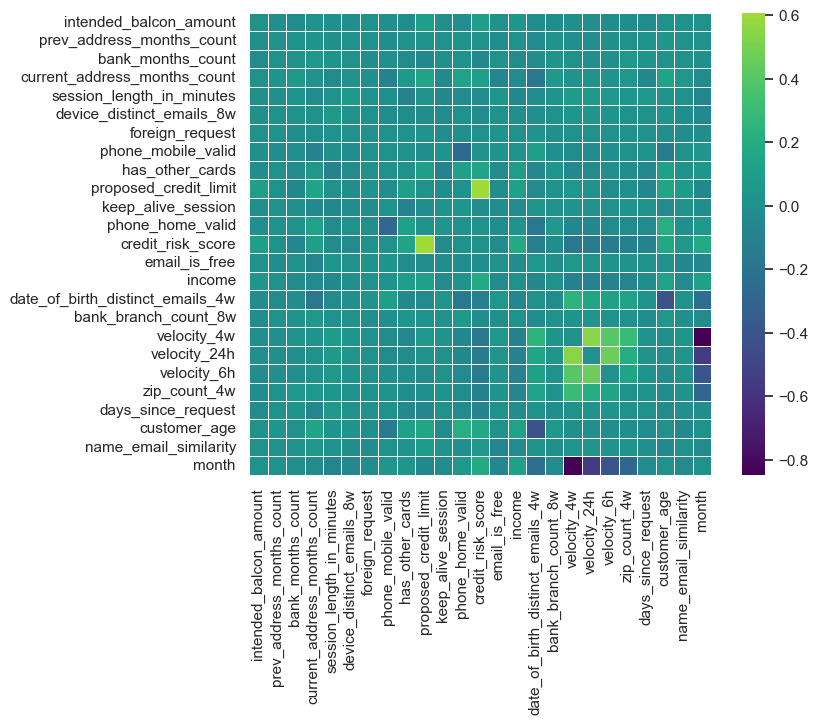

0

In [30]:
df_fraud[continuous_list] = df_fraud[continuous_list].apply(lambda x: x.fillna(x.mean()))

x_df_fraud, x_df_fraud_test, y_df_fraud, y_df_fraud_test = train_test_split(
                                                                    df_fraud.drop("fraud_bool",axis=1), 
                                                                    df_fraud["fraud_bool"], 
                                                                    stratify = df_fraud["fraud_bool"], 
                                                                    test_size = 0.2)
df_fraud_train = pd.concat([x_df_fraud, y_df_fraud], axis = 1)
df_fraud_test = pd.concat([x_df_fraud_test, y_df_fraud_test], axis = 1)

f_aux.get_corr_matrix(dataset = df_fraud_train[continuous_list], metodo = 'pearson', size_figure = [8, 6])

In [31]:
f_aux.get_percent_null_values_target(df_fraud_train, continuous_list, target = "fraud_bool")

No existen variables con valores nulos


## Tratamiento de las variables categoricas:

Para la correlacion de spearman es necesario convertir las variables categoricas en numericas y luego obtener la correlación

In [32]:
categoricals_list

['fraud_bool',
 'device_os',
 'source',
 'housing_status',
 'employment_status',
 'payment_type']

In [33]:
def cramers_v(confusion_matrix):
    """ 
    calculate Cramers V statistic for categorical-categorical association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    confusion_matrix tabla creada con pd.crosstab()
    
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [34]:
confusion_matrix = pd.crosstab(df_fraud_train["fraud_bool"], df_fraud_train["device_os"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

device_os    linux  macintosh   other  windows   x11
fraud_bool                                          
0           264804      42377  272500   205771  5725
1             1357        600    1572     5227    67


0.0809818636850644

In [35]:
confusion_matrix = pd.crosstab(df_fraud_train["fraud_bool"], df_fraud_train["fraud_bool"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

fraud_bool       0     1
fraud_bool              
0           791177     0
1                0  8823


0.9999426978916621

In [36]:
confusion_matrix = pd.crosstab(df_fraud_train["fraud_bool"], df_fraud_train["source"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

source      INTERNET  TELEAPP
fraud_bool                   
0             785574     5603
1               8727       96


0.0045096844811087725

In [37]:
categoricals_list

['fraud_bool',
 'device_os',
 'source',
 'housing_status',
 'employment_status',
 'payment_type']

In [38]:
df_fraud["payment_type"].unique()

['AA', 'AB', 'AC', 'AD', 'AE']
Categories (5, object): ['AA', 'AB', 'AC', 'AD', 'AE']

In [39]:
device_map = {'windows': 1, 'other': 2, 'linux': 3, 'macintosh': 4, "x11": 5}
source_map = {"INTERNET": 1, "TELEAPP": 2}
housing_map = {'BA': 1, 'BB': 2, 'BC': 3, 'BD': 4, "BE": 5, 'BF': 6, 'BG': 7}
employment_map = {'CA': 1, 'CB': 2, 'CC': 3, 'CD': 4, "CE": 5, 'CF': 6, 'CG': 7}
payment_map = {'AA': 1, 'AB': 2, 'AC': 3, 'AD': 4, "AE": 5, 'AF': 6, 'AG': 7}

df_fraud['device_os'] = df_fraud['device_os'].map(device_map).astype("float64")
df_fraud['source'] = df_fraud['source'].map(source_map).astype("float64")
df_fraud['housing_status'] = df_fraud['housing_status'].map(housing_map).astype("float64")
df_fraud['employment_status'] = df_fraud['employment_status'].map(employment_map).astype("float64")
df_fraud['payment_type'] = df_fraud['payment_type'].map(payment_map).astype("float64")

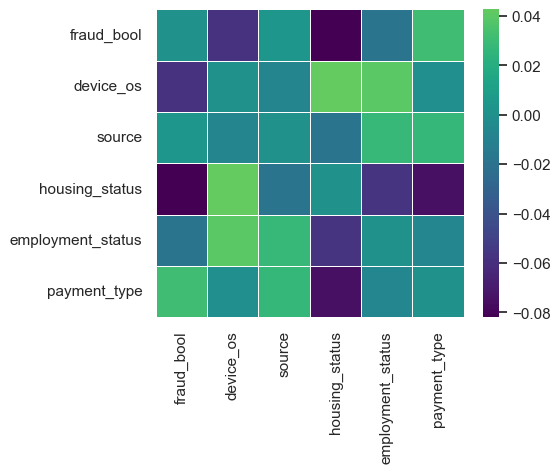

0

In [40]:
f_aux.get_corr_matrix(dataset = df_fraud[categoricals_list], metodo='spearman', size_figure=[5,4])

### Tratamiento de valores nulos:

No hay valores nulos en las variables categoricas de este conjunto de datos, pero si hubiera hariamos lo siguiente:

In [41]:
df_fraud_train[categoricals_list] = df_fraud_train[categoricals_list].astype("object")\
.fillna("SIN VALOR").astype("category")

df_fraud_test[categoricals_list] = df_fraud_test[categoricals_list].astype("object").\
fillna("SIN VALOR").astype("category")

### Guardando las tablas de train y test:

In [42]:
df_fraud_train.to_csv("../data/train_df_data_preprocessing_missing_outlier.csv")
df_fraud_test.to_csv("../data/test_df_data_preprocessing_missing_outlier.csv")